# Logistic Regression

In this R Jupyter notebook, we go through the code implementation for a logistic regression model. In particular, we are interested in whether the probability of getting $A/A-$ is related to both midterm 1 score AND gender.

## 1. Loading the data

If the data size is not large, it may be convenient to make two data vectors manually as follows.

In [1]:
midterm1 <- c(23, 22.5, 21.5, 21.25, 13, 25, 14.5, 20, 18, 18, 19.5, 
              25, 23, 19, 24, 20, 24, 24, 18.5, 18, 16, 21.85, 25, 19.5) # explanatory variable 1

gender <- c(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1) # explanatory variable 2

aam <- c(1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0) # response variable

If the data size is not small enough for a manual input, we have to load the data. The following is an example of loading the data "aam.csv" from my desktop folder. Please refer to the previous jupyter notebooks, especially "SLR.ipynb", which contains details of loading the data.

In [2]:
setwd("~/Desktop/")
data <- read.csv("aam.csv", header = TRUE) # R is case-sensitive
head(data)
aam <- data[, 1]
midterm1 <- data[, 2]
gender <- data[, 3]

,AAm,midterm1,gender
,<int>,<dbl>,<int>
1,1,23.00,0
2,1,22.50,0
3,1,21.50,0
4,0,21.25,0
5,0,13.00,0
6,1,25.00,0


For Window users, the fist line of the code above is replaced with

setwd("C:/Users/hyungsuktak/Desktop/")

If the data file is a .txt file, then the following code will be used instead.

midterm <- read.table("aam.txt", header = TRUE)

To check whether the data are correctly loaded, we use the function "head" that shows the first six lines of the data. To avoid any mistake, it is better to check whether the first row is correctly loaded. In this case, the first row correctly starts with (1, 23, 0).

Next, we designate each column of the data to an object, as we input manually in the beginning. 

Now the data are loaded, and we are ready to conduct a multiple linear regression analysis.

## 2. Fitting a logistic regression model

The logistic regression model assumes that each binary response variable $Y_i$ is an independent (but not identically distributed) Bernoulli random variable with probability of getting $A/A-$ equal to $\theta_i$, i.e.,

$$
Y_i\stackrel{\textrm{ind.}}{\sim} \textrm{Bern}(\theta_i)
$$

The mean of the response variable $\theta_i$ is connected to a linear function of regression coefficient via a logit link function. The main reason for this transformation is to match the ranges of $g(\theta_i)$ and the linear function.

$$
\textrm{logit}(\theta)=\log\left(\frac{\theta_i}{1-\theta_i}\right)=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\epsilon_i=x_i^{\top}\beta,
$$

where $x_{i1}$ is the midterm 1 score  of the $i$-th person, $x_{i2}$ is the indicator variable for female. The model also shows the matrix notation: $x_i=(1, x_{i1}, x_{i2})^{\top}$ and $\beta=(\beta_0, \beta_1, \beta_2)^{\top}$. We note that vectors are basically column vectors (default in mathematics). In this model, $\beta_0, \beta_1, \beta_2$ are unknown parameters.


The code below fits a logistic regression model and saves the fit in the object "res". To see the fit, let's type the following line.

In [3]:
res <- glm(aam ~ midterm1 + gender, family = binomial)
summary(res)


Call:
glm(formula = aam ~ midterm1 + gender, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9580  -0.3010   0.1433   0.4394   1.6838  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -20.4588     8.9723  -2.280   0.0226 *
midterm1      0.9659     0.4193   2.304   0.0212 *
gender        1.8501     1.4624   1.265   0.2058  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 33.104  on 23  degrees of freedom
Residual deviance: 15.301  on 21  degrees of freedom
AIC: 21.301

Number of Fisher Scoring iterations: 6


At $\alpha=0.05$, both  $\beta_0$ and  $\beta_1$ are significantly different from zero based on their approximate $z$-tests (not $t$-tests) because both $p$-values (0.0226 and 0.0212) are smaller than $\alpha=0.05$. Thus, WHEN ALL OTHER EXPLANATORY VARIABLES ARE HELD CONSTANT (i.e., when gender is fixed or within a sub-population defined by gender), a unit increase in midterm1 changes the odds of getting $A/A-$ by a factor of $e^{0.9659} = 2.627$. Note that the odds  of getting $A/A-$ are defined as the probability of getting $A/A-$ divided by the probability of not getting $A/A-$, i.e., $\frac{\theta_i}{1 - \theta_i}$.

Because gender is not significant, we conclude that being female does not affect the odds of getting $A/A-$ when midterm 1 score is held constant in the model.

The default R output does not display any $p$-value for goodness-of-fit test for checking whether all explanatory variables are meaningless ($\beta_1=\beta_2=0$) or AT LEAST ONE of the explanatory variables is meaningful (non-zero) in explaning  the mean of the response variable. But we can test it ourselves using the given information. The test statistic $T$ is the difference between $\texttt{Residual}$ $\texttt{deviance}$ and $\texttt{Null}$ $\texttt{deviance}$. This test statistic asymptotically follows the $\chi^2_m$ distribution by the asymptotic property of the generalized likelihood ratio test statistic, where $m$ is the number of exploratory variables (not counting the intercept term). The observed test statistic is

$$
t = 33.104 - 15.301=17.803.
$$

Since there are only two exploratory variables, the resulting $p$-value is

$$
P(T\ge t\mid H_0)
$$

This probability can be computed by the following code.

In [4]:
1 - pchisq(17.803, df = 2)

[1] 0.0001361845

Since this $p$-value is smaller than $\alpha=0.05$, we reject the null, concluding that the proposed model with midterm 1 score and gender is at least meaningful. Note that passing this goodness-of-fit test does not always mean that the model is optimal.


## 3. Selecting a model

Since there is an insignificant exploratory variable, gender, it is reasonable to conduct a model selection process. We use the Akaike Information Criterion (AIC).

In [5]:
res.back <- step(res)

Start:  AIC=21.3
aam ~ midterm1 + gender

           Df Deviance    AIC
- gender    1   17.203 21.203
<none>          15.301 21.301
- midterm1  1   30.927 34.927

Step:  AIC=21.2
aam ~ midterm1

           Df Deviance    AIC
<none>          17.203 21.203
- midterm1  1   33.104 35.104


The result above shows that the first step of the procedure starts with the full model with all available exploratory variables, i.e., midterm1 and gender. In this step, it tries removing one exploratory variable at a time computing AIC. The negative sign infront of the variable name (e.g., - gender) means that the resulting AIC was obtained by removing the variable. For example, AIC 21.203 is obtained when we remove gender from the full model. It turns out that removing gender achieves the smallest AIC.

So the second step starts with the model with only  midterm1. Similarly, in this step, it tries removing one exploratory variable (midterm1) and computes AIC. It turns out that the resulting AIC becomes higher when we remove midterm1. Because the procedure cannot improve AIC (getting smaller AIC), the model selection procedrue stops there. The final model with only midterm1 is saved in "res.back".

In [6]:
summary(res.back)


Call:
glm(formula = aam ~ midterm1, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1551  -0.5142   0.2013   0.4789   1.4872  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -16.9898     6.6565  -2.552   0.0107 *
midterm1      0.8352     0.3248   2.571   0.0101 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 33.104  on 23  degrees of freedom
Residual deviance: 17.203  on 22  degrees of freedom
AIC: 21.203

Number of Fisher Scoring iterations: 6


The estimated regression coefficient seems to change noticeably.  This time, a unit increase in midterm1 changes the odds of getting $A/A-$ by a factor of $e^{0.8352} = 2.305$, not $2.627$ as computed before.

## 4. Making an inference

Although not covered in the class, it is important to know that the fit of the logistic regression also produces the estimated probability of getting $A/A-$ for each person. This information is useful for making a prediction (or classification). It is automatically saved during the fitting process, and can be loaded by

In [7]:
res.back$fitted.values

1           2           3           4           5           6 
0.901949586 0.858330399 0.724385552 0.680816828 0.002166162 0.979952865 
          7           8           9          10          11          12 
0.007540678 0.428876810 0.123816319 0.123816319 0.330921423 0.979952865 
         13          14          15          16          17          18 
0.901949586 0.245713528 0.954965551 0.428876810 0.954965551 0.954965551 
         19          20          21          22          23          24 
0.176652875 0.123816319 0.025903861 0.778790277 0.979952865 0.330921423

Sometimes, it is interesting to see the relationship between the estimated probability and each exploratory variable. For example,

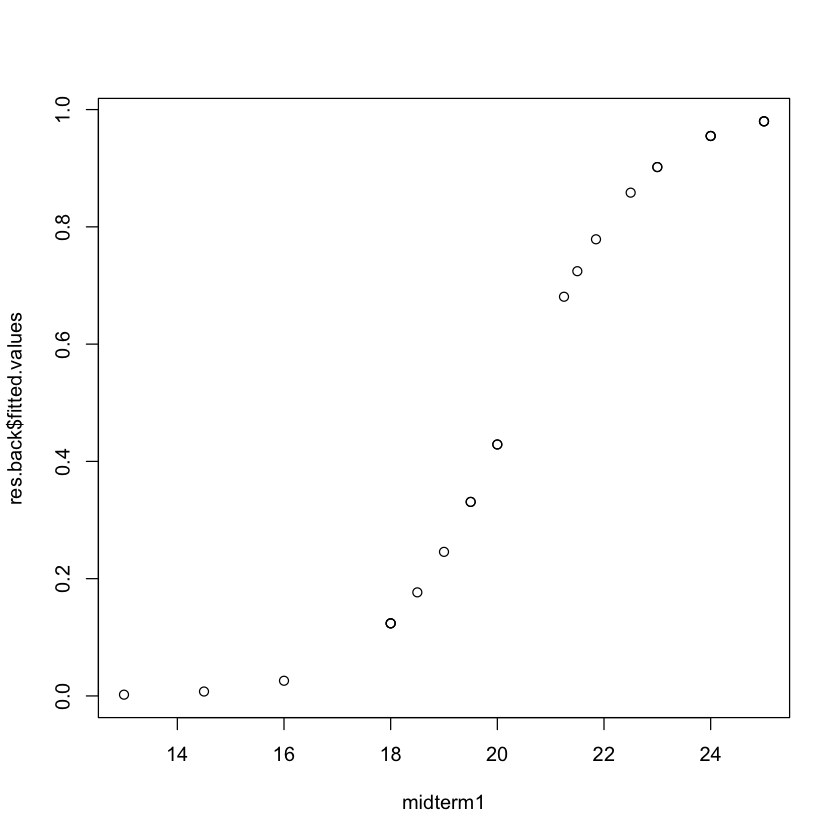

In [8]:
plot(midterm1, res.back$fitted.values)